# 12100번 2048(Easy) - Gold 2

#### 알고리즘 분류: 시뮬레이션 , 구현 , 브루트포스

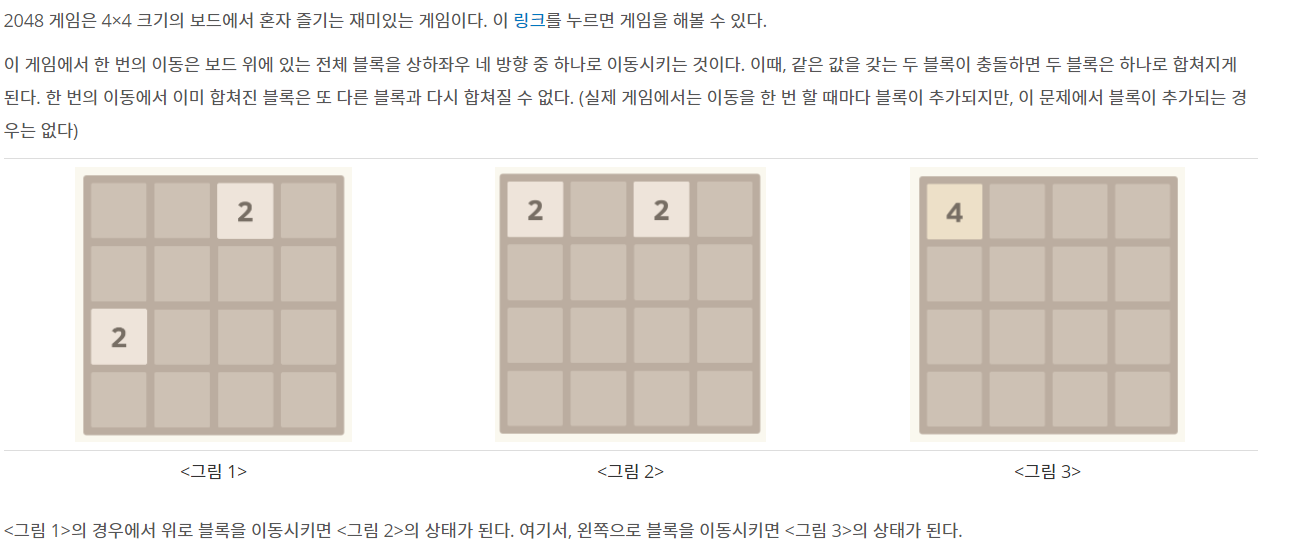
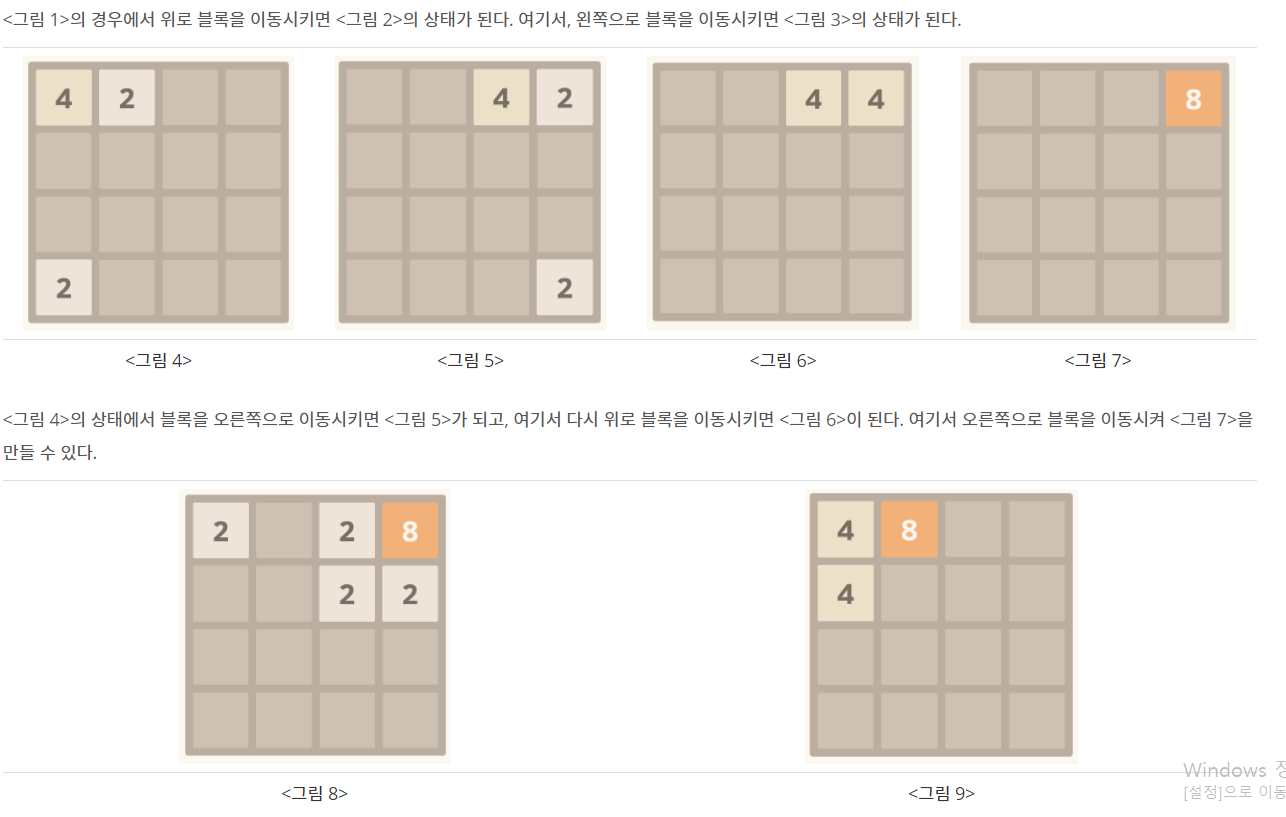
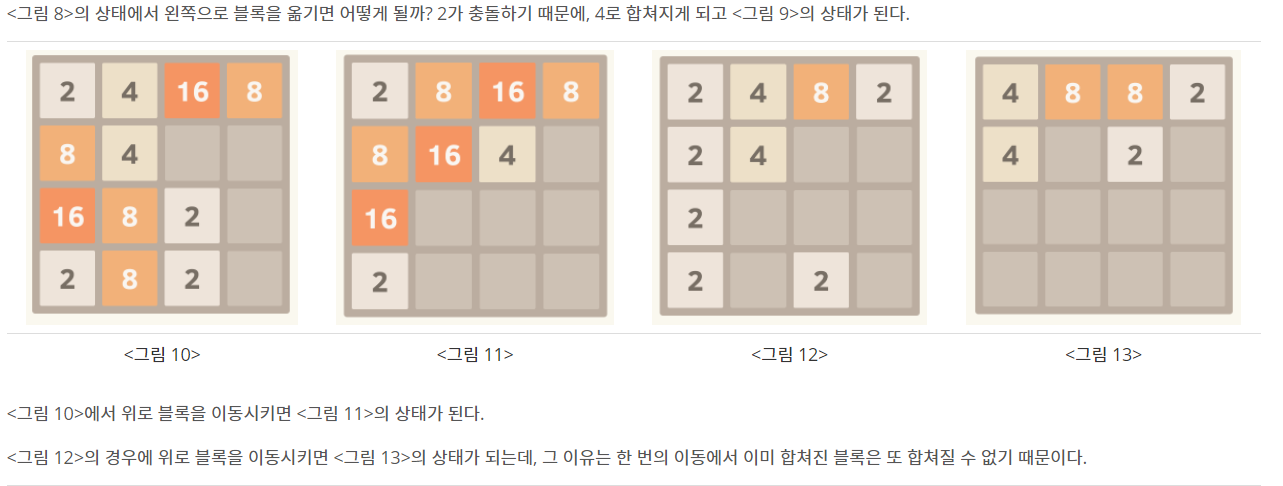
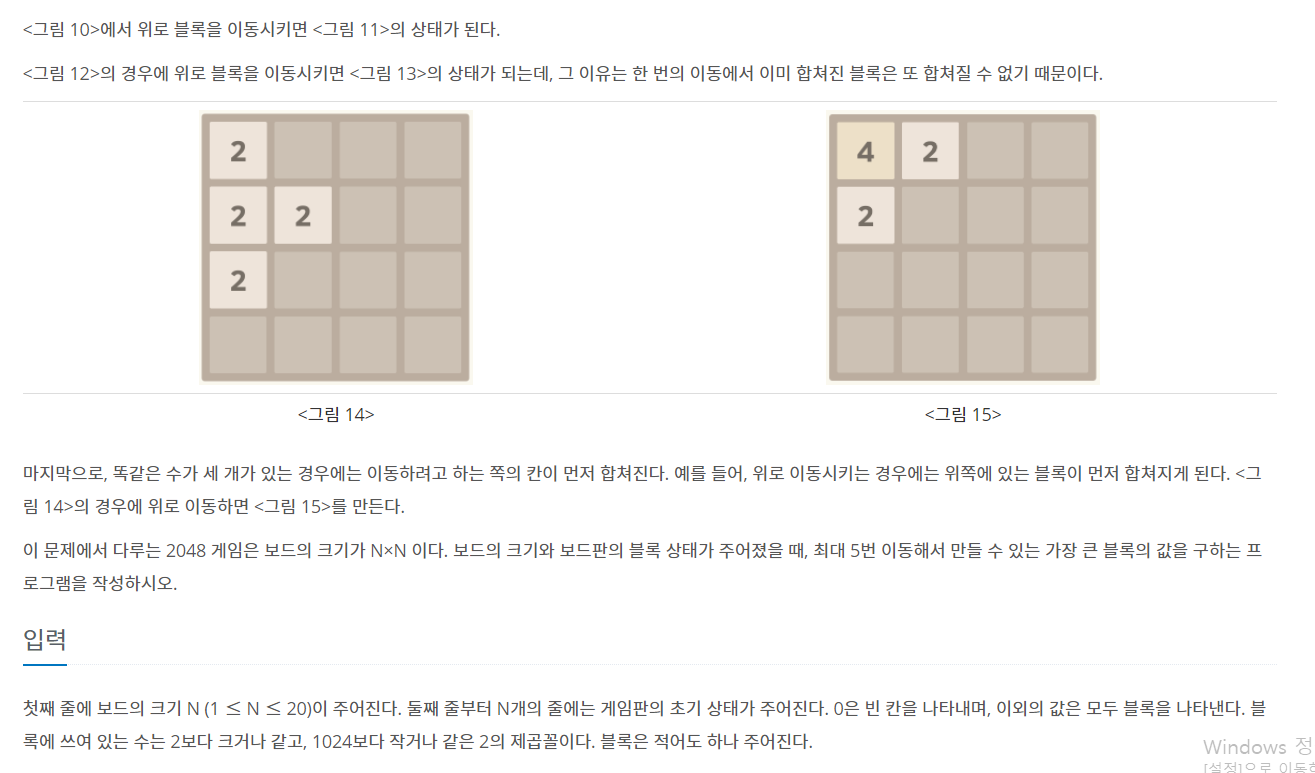

In [ ]:
n = int(input())
from copy import deepcopy
board = [list(map(int,input().split())) for _ in range(n)]
direction = [[1,0],[-1,0], [0,1],[0,-1]]
def move(board,dir):
    dy,dx = dir
    visit = [[0] * n for _ in range(n)]
    start_y,end_y,term_y = [0,n,1] if dy == -1 else [n-1,-1,-1]
    start_x,end_x,term_x = [0,n,1] if dx == -1 else [n-1,-1,-1]
    for y in range(start_y,end_y,term_y):
        for x in range(start_x,end_x,term_x):
            ny,nx =dy+y,dx+x
            while 0<=ny<n and 0<=nx<n and board[ny-dy][nx-dx] != 0 :
                if board[ny][nx] == 0:
                    board[ny][nx] = board[ny-dy][nx-dx]
                    board[ny-dy][nx-dx] = 0
                    ny+= dy
                    nx += dx
                elif board[ny][nx] == board[ny-dy][nx-dx] and visit[ny][nx] == 0 and visit[ny-dy][nx-dx]==0:
                    board= merge(ny-dy,nx-dx,dir,board,visit)
                    break
                else:
                    break


    return board
def merge(y,x,dir,board,visit):

    ny,nx = y+dir[0] , x+dir[1]

    lst = [[y,x]]
    while 0<=ny<n and 0<=nx<n and board[ny][nx] == board[y][x] and visit[ny][nx] == 0 :
        lst.append([ny,nx])
        board[ny][nx] = 0
        ny+= dir[0]
        nx+= dir[1]
    lst.reverse()
    val = board[y][x]
    board[y][x] = 0
    if len(lst) % 2 == 0:
        for i in range(0,len(lst) // 2):
            my,mx = lst[i]
            board[my][mx] = val * 2
            visit[my][mx] = 1
    else:
        for i in range(0,len(lst) // 2):
            my, mx = lst[i]
            board[my][mx] = val * 2
            visit[my][mx] = 1
        my,mx = lst[len(lst)//2]
        board[my][mx] = val

    return board




max_val = 0

def solve(board,dir=None,count=0):
    global max_val
    if count > 5:
        for i in range(n):
            for j in range(n):
                if max_val < board[i][j] :
                    max_val = board[i][j]
        return


    if dir:
        board = move(board,dir)


    for next_dir in direction:

        temp_board = deepcopy(board)

        solve(temp_board,next_dir,count+1)
solve(board)
print(max_val)